In [ ]:
%load_ext autoreload
%autoreload
from funcs_plotting import *
import numpy as np
import scipy



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# sr = 1000
# t_max = 10
# tau = 1
# xi = tau
# t = np.arange(0, t_max, 1/sr)

# wf = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t) + np.sin(2*np.pi*30*t)
# f, sfft = map(get_sfft(wf, sr, tau, xi=xi).get, ['freq_ax', 'sfft'])

In [74]:

data = 'Old Data'
# data = 'New Data'

if data == 'New Data':
    filepath = "C:\\Users\\Owner\\OneDrive\\Documents\\GitHub\\SOAEpeaks\\Data\\"
    wf_title = 'ACfls27rearSOAEwfD01.txt'
    wf = np.loadtxt(filepath + wf_title)
    sr = 44100
else:
    filepath = "C:\\Users\\Owner\\OneDrive\\Documents\\GitHub\\SOAEpeaks\\Data\\"
    wf_title = 'anole_AC6rearSOAEwfB1.mat'
    mat = scipy.io.loadmat(filepath + wf_title)
    wf = np.squeeze(mat['wf'])
    sr=44100

In [85]:
tau=20 / 1000
xi=10 / 1000
# xi = tau
# f, abs_avg_phase_diffs = map(get_coherence(wf, sr, tau, xi=xi, return_all=True).get, ['freq_ax', 'means'])
f, sfft = map(get_sfft(wf, sr, tau, xi=xi).get, ['freq_ax', 'sfft'])
C_xi = get_coherence(wf, sr, tau, xi=xi, ref_type='next_win', sfft=sfft, freq_ax=f)

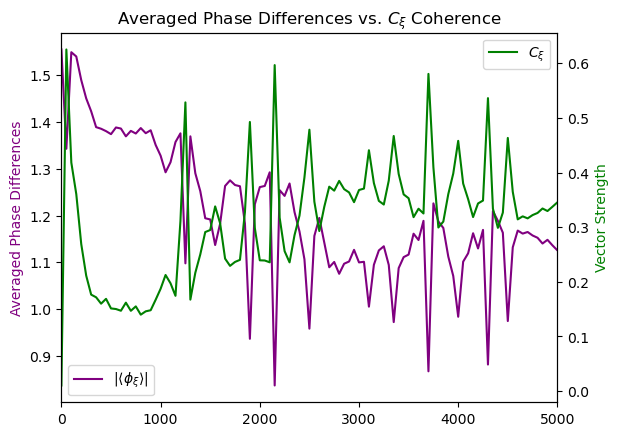

In [87]:

do_correction = True

phases = np.angle(sfft)

if do_correction:
    phase_correction = np.empty(phases.shape)
    for i in range(phases.shape[0]):
        phase_correction[i, :] = np.angle(np.exp(1j * 2 * np.pi * f * xi * i ))

phases = phases - phase_correction
UW_phases = np.unwrap(phases, axis=0)
phase_diffs = np.diff(UW_phases, axis=0)
abs_avg_phase_diffs = np.abs(phase_diffs).mean(axis=0)

plt.plot(f, abs_avg_phase_diffs, label=r'$|\langle \phi_{\xi} \rangle|$', color='purple')
plt.title(r'Averaged Phase Differences vs. $C_{\xi}$ Coherence')
ax_phase = plt.gca()
ax_phase.legend(loc = 'lower left')
ax_phase.set_ylabel('Averaged Phase Differences', color='purple')

ax_C_xi = ax_phase.twinx()
ax_C_xi.plot(f, C_xi, label=r'$C_{\xi}$', color='green')
ax_C_xi.legend(loc = 'upper right')
ax_C_xi.set_ylabel('Vector Strength', color='g')
plt.xlim(0, 5000)
plt.show()